In [1]:
import sys, os
import warnings
warnings.filterwarnings("ignore")
wd = "/".join(os.getcwd().split('/')[:-1])
sys.path.append( wd + '/marketdata/' )
import marketdata as md

%run cryptompt.py

In [2]:
dstart   = '2020-11-01'
dend     = '2021-04-07'
tkn_list = ['bitcoin','litecoin','ethereum']
curr     = 'usd'

hd    = md.HistoricalMarketData(tkn_list,curr,dstart,dend)
data  = hd.price()

In [3]:
init_weights = np.array([0.5,0.2,0.3])
prt = Portfolio(init_weights, data, 0)
prt.details()

,bitcoin,litecoin,ethereum,ExpectedReturns,Volatility,SharpeRatio
0,0.5,0.2,0.3,1.734973,0.56876,3.050447


#### Brute Force Method

In [4]:
sim = MonteCarlo(tkn_list, data, 0, 1000)
sim.details()

,bitcoin,litecoin,ethereum,ExpectedReturns,Volatility,SharpeRatio
MaxSharpe,0.615938,0.000647,0.383415,1.729424,0.550627,3.140829
MinVolatility,0.853832,0.010954,0.135214,1.650165,0.539905,3.056398


#### Theoretical Approach

In [5]:
theo = MPTheory(tkn_list, data, 0, 100)
theo.details()

,bitcoin,litecoin,ethereum,ExpectedReturns,Volatility,SharpeRatio
MaxSharpe,0.613623,0.000000e+00,0.386377,1.730284,0.550873,3.140986
MinVolatility,0.835253,6.938894e-18,0.164747,1.657998,0.539234,3.074727


## The Rational Portfolio

The idea behind the Rational Portfolio is to provide the user a recommendation on how to invest their money. Depending on the risk profile of the user, i.e., wether they outweigh minimum volatility over maximum Sharpe ratio, this tool will adjust the Expected Returns accordingly.

input:
    * Token List
    * Historical Data
    * Risk Free Rate (Note: There is no such thing as Zero Risk while investing in Crypto)
    * Number of numerical simulations
    * Risk Profile: [Favoring Sharpe, Favoring Minimum Volatility]

In [6]:
rat = RationalPortFolio(tkn_list, data, 1, 2500,[0.2,0.8])
rat.results()

,bitcoin,litecoin,ethereum,ExpectedReturns,Volatility,SharpeRatio
MaxSharpe,0.274017,0.000185,0.725798,1.841019,0.610084,1.378529
MinVolatility,0.831696,0.005591,0.162713,1.658253,0.539503,1.220111


In [7]:
rat.recommendation()

,bitcoin,litecoin,ethereum,ExpectedReturns,Volatility,SharpeRatio
Recommendation,0.72016,0.00451,0.27533,1.694806,0.553619,1.251794


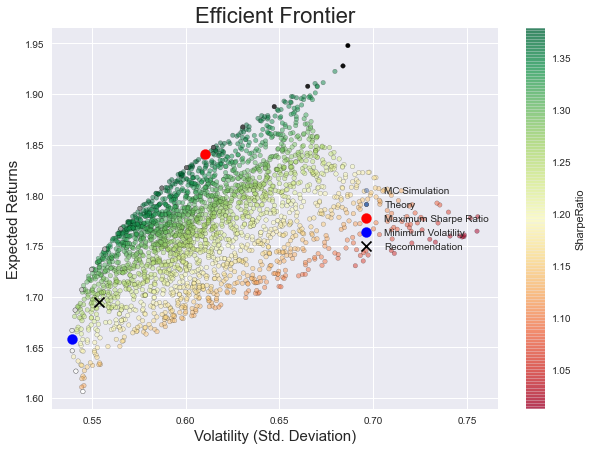

In [8]:
rat.plot()